In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 한글폰트 설정
font_path = 'c:/windows/fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
# matplotlib의 rc(run command) 함수를 사용해서 한글폰트 설정
matplotlib.rc('font', family=font_prop)

In [3]:
crisis_df = pd.read_csv('crisis_data/total_crisis.csv')

In [4]:
city_names = crisis_df['CTPRVN_NM'].unique()
city_names

array(['경기', '강원', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

#### 도시 / 군구 / 등급(AAA ~ NR) / 부도등급 ( ~ )

In [5]:
# prac_df = crisis_df.groupby('SIGNGU_NM')['CTPRVN_NM'].first().reset_index().sort_values(by='CTPRVN_NM')
# prac_df = prac_df[['CTPRVN_NM', 'SIGNGU_NM']]

total_df = pd.DataFrame()

temp_df = crisis_df.loc[:,['CTPRVN_NM','SIGNGU_NM']].drop_duplicates(['SIGNGU_NM'])
total_df = pd.concat([total_df, temp_df], ignore_index=True)

total_df

,CTPRVN_NM,SIGNGU_NM
0,경기,평택시
1,경기,김포시
2,경기,시흥시
3,경기,파주시
4,경기,화성시
...,...,...
223,충북,충주시
224,충북,청주시상당구
225,충북,청주시서원구
226,충북,청주시청원구


In [244]:
city_names = total_df['CTPRVN_NM'].unique()
signgu_names = total_df['SIGNGU_NM'].unique()

['경기' '강원' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북'] ['평택시' '김포시' '시흥시' '파주시' '화성시' '안성시' '양주시' '양평군' '여주시' '연천군' '포천시' '하남시'
 '이천시' '오산시' '의왕시' '부천시' '과천시' '광명시' '가평군' '광주시' '군포시' '구리시' '남양주시' '동두천시'
 '의정부시' '고양시덕양구' '성남시분당구' '성남시수정구' '성남시중원구' '수원시권선구' '수원시영통구' '수원시장안구'
 '수원시팔달구' '안산시단원구' '안산시상록구' '안양시동안구' '안양시만안구' '용인시기흥구' '용인시수지구' '용인시처인구'
 '고양시일산동구' '고양시일산서구' '삼척시' '원주시' '강릉시' '고성군' '속초시' '동해시' '양구군' '양양군' '영월군'
 '철원군' '춘천시' '인제군' '정선군' '태백시' '횡성군' '평창군' '홍천군' '화천군' '거제시' '거창군' '김해시'
 '남해군' '밀양시' '사천시' '산청군' '양산시' '의령군' '진주시' '창녕군' '통영시' '하동군' '함안군' '함양군'
 '합천군' '창원시성산구' '창원시의창구' '창원시진해구' '창원시마산합포구' '창원시마산회원구' '경산시' '경주시' '고령군'
 '구미시' '군위군' '김천시' '문경시' '봉화군' '상주시' '성주군' '안동시' '영덕군' '영양군' '영주시' '영천시'
 '예천군' '울릉군' '울진군' '의성군' '청도군' '청송군' '칠곡군' '포항시남구' '포항시북구' '남구' '동구' '북구'
 '서구' '광산구' '중구' '달서구' '달성군' '수성구' '대덕구' '유성구' '강서구' '금정구' '기장군' '동래구'
 '사상구' '사하구' '수영구' '연제구' '영도구' '부산진구' '해운대구' '강남구' '강동구' '강북구' '관악구' '광진구'
 '구로구' '금천구' '노원구' '도봉구' '동작구' '

In [269]:
crisis_df.loc[(crisis_df['CTPRVN_NM'] == '서울') & (crisis_df['SIGNGU_NM'] == '강남구'), 'CREDT_GRAD_NM'].value_counts()

NR      233798
B        92231
D        91891
CCC-     75915
CCC+     68750
BB+      64307
B-       63565
B+       58471
BB-      55349
BB       54253
CCC      52467
BBB-     44496
BBB      41643
BBB+     35015
A-       30471
CC       29967
C        18648
A        13972
A+       11136
AA-       8100
AA        8065
AA+       4014
AAA       1707
Name: CREDT_GRAD_NM, dtype: int64

In [39]:
total_grade_df = pd.DataFrame()

In [26]:
# 도시 데이터
total_df['CTPRVN_NM'].unique()

array(['경기', '강원', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [140]:
# 시군구 데이터
city = '충북'
signgu_data = total_df.loc[total_df['CTPRVN_NM'] == city, 'SIGNGU_NM']
signgu_data

214       괴산군
215       단양군
216       보은군
217       영동군
218       옥천군
219       음성군
220       제천시
221       증평군
222       진천군
223       충주시
224    청주시상당구
225    청주시서원구
226    청주시청원구
227    청주시흥덕구
Name: SIGNGU_NM, dtype: object

In [141]:
test_df = pd.DataFrame()
temp_df = pd.DataFrame()
for idx, signgu in enumerate(signgu_data):
    print(f'{idx}번째 전처리중')
    temp_df = crisis_df.loc[(crisis_df['CTPRVN_NM'] == city) & (crisis_df['SIGNGU_NM'] == signgu), 'CREDT_GRAD_NM']\
.value_counts().sort_values().to_frame()
    
    temp_df = temp_df.T
    test_df = pd.concat([test_df, temp_df], ignore_index=True)

test_df = test_df[[\
        'AAA','AA+','AA','AA-','A+','A','A-',\
        'BBB+','BBB','BBB-','BB+','BB','BB-','B+','B','B-',\
        'CCC+','CCC','CCC-','CC','C','D','NR']]

print(f'before total_grade_df length = {len(total_grade_df)}')
print(f'test_df length = {len(test_df)}')

total_grade_df = pd.concat([total_grade_df, test_df], ignore_index=True)
print(f'total_grade_df + test_df = {len(total_grade_df + test_df)}')


0번째 전처리중
1번째 전처리중
2번째 전처리중
3번째 전처리중
4번째 전처리중
5번째 전처리중
6번째 전처리중
7번째 전처리중
8번째 전처리중
9번째 전처리중
10번째 전처리중
11번째 전처리중
12번째 전처리중
13번째 전처리중
before total_grade_df length = 214
test_df length = 14
total_grade_df + test_df = 228


In [142]:
total_grade_df

,AAA,AA+,AA,AA-,A+,A,A-,BBB+,BBB,BBB-,...,B+,B,B-,CCC+,CCC,CCC-,CC,C,D,NR
0,337.0,997.0,1232.0,1567.0,2547.0,2680.0,6249,7428,10216,12641,...,19080,25840,17926,18020,13075,14522,7175,3231,19877,49160
1,296.0,332.0,466.0,664.0,1429.0,1795.0,6827,8341,11000,13821,...,26688,35551,26164,25336,16689,18207,9737,5260,25349,50921
2,325.0,364.0,889.0,1486.0,2489.0,3101.0,8766,10291,13679,16527,...,25421,30914,22304,21825,14581,15470,7991,4516,21654,49141
3,274.0,418.0,557.0,753.0,1667.0,1892.0,5148,6086,7883,11175,...,23590,30603,22304,21141,14780,17383,7619,4585,23856,47703
4,675.0,1237.0,2233.0,2550.0,4226.0,5617.0,17121,20773,27977,32552,...,54465,71534,52831,48773,34697,38161,19247,10104,43582,87142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,68.0,109.0,162.0,200.0,446.0,613.0,1577,2260,3284,4208,...,7010,9325,6631,6269,4594,5716,2146,1204,7226,15964
224,21.0,72.0,71.0,89.0,108.0,213.0,796,1305,2355,3024,...,4089,5544,3299,3552,2297,3654,960,792,3913,10899
225,NaN,10.0,12.0,16.0,178.0,288.0,1179,2127,3198,3775,...,5890,8146,5728,5482,3760,4874,1945,1096,5128,12958
226,128.0,178.0,354.0,409.0,620.0,1006.0,3272,3945,5349,6141,...,10642,12451,8501,8259,5704,6863,2752,1988,6842,16021


In [144]:
total1_df = pd.concat([total_df, total_grade_df], axis=1)
total_df = total1_df

total_df

,CTPRVN_NM,SIGNGU_NM,AAA,AA+,AA,AA-,A+,A,A-,BBB+,...,B+,B,B-,CCC+,CCC,CCC-,CC,C,D,NR
0,경기,평택시,337.0,997.0,1232.0,1567.0,2547.0,2680.0,6249,7428,...,19080,25840,17926,18020,13075,14522,7175,3231,19877,49160
1,경기,김포시,296.0,332.0,466.0,664.0,1429.0,1795.0,6827,8341,...,26688,35551,26164,25336,16689,18207,9737,5260,25349,50921
2,경기,시흥시,325.0,364.0,889.0,1486.0,2489.0,3101.0,8766,10291,...,25421,30914,22304,21825,14581,15470,7991,4516,21654,49141
3,경기,파주시,274.0,418.0,557.0,753.0,1667.0,1892.0,5148,6086,...,23590,30603,22304,21141,14780,17383,7619,4585,23856,47703
4,경기,화성시,675.0,1237.0,2233.0,2550.0,4226.0,5617.0,17121,20773,...,54465,71534,52831,48773,34697,38161,19247,10104,43582,87142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,충북,충주시,68.0,109.0,162.0,200.0,446.0,613.0,1577,2260,...,7010,9325,6631,6269,4594,5716,2146,1204,7226,15964
224,충북,청주시상당구,21.0,72.0,71.0,89.0,108.0,213.0,796,1305,...,4089,5544,3299,3552,2297,3654,960,792,3913,10899
225,충북,청주시서원구,NaN,10.0,12.0,16.0,178.0,288.0,1179,2127,...,5890,8146,5728,5482,3760,4874,1945,1096,5128,12958
226,충북,청주시청원구,128.0,178.0,354.0,409.0,620.0,1006.0,3272,3945,...,10642,12451,8501,8259,5704,6863,2752,1988,6842,16021


In [145]:
total_df.to_csv('crisis_data/total_crisis_data.csv')

In [35]:
# DataFrame 삭제 함수
# del [[total_grade_df]]

NameError: name 'total_grade_df' is not defined

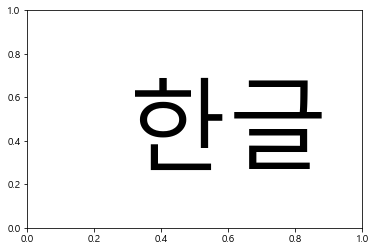

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


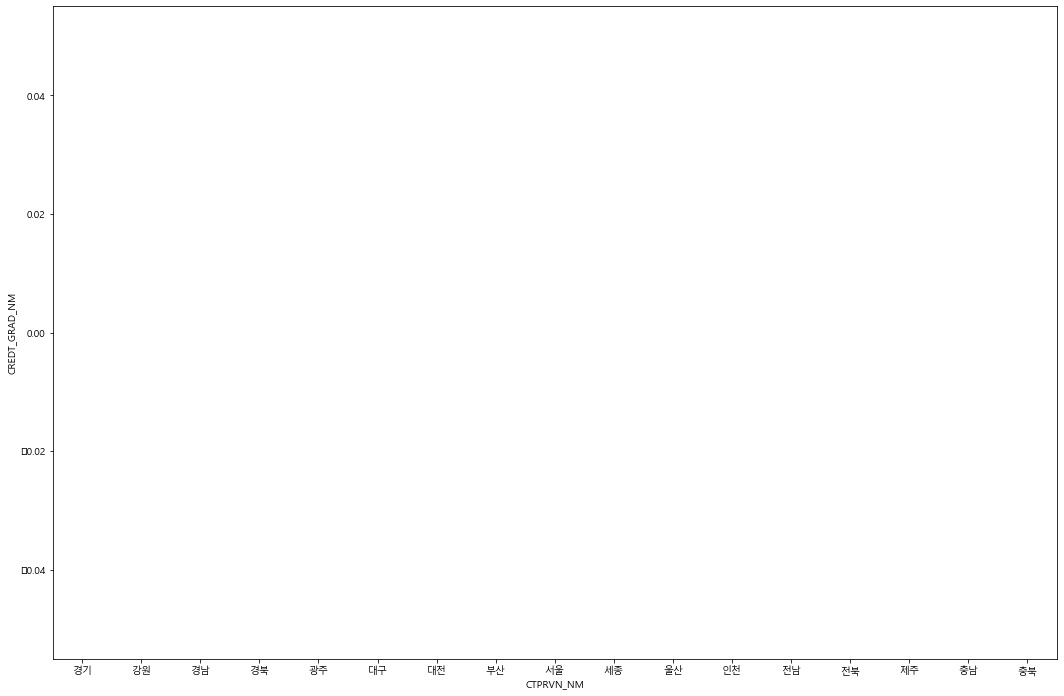

In [39]:
plt.rc('font', family='Malgun Gothic')
plt.text(0.3, 0.3, '한글', size=100)

# figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure, axes1 = plt.subplots(nrows=1, ncols=1)

# figure size 조절
figure.set_size_inches(18, 12)

# barplot() - x축에는 행정구역, y축에는 인구수
sns.barplot(x='CTPRVN_NM', y=grade_count, data=crisis_df, ax=axes1)